In [128]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import time
import cv2

## checking convolution theorem

In [76]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [122]:
def sizez(im1,im2):
    w1,h1 = im1.shape
    w2,h2 = im2.shape
    
    if(w1>w2):
        widthbig = 1
        big = im1
        small = im2

    else:
        widthbig = 2
        big = im2
        small = im1

    temp = np.zeros((big.shape[0],small.shape[1]))

    temp[0:small.shape[0],0:small.shape[1]] = small

    if(widthbig == 1):
        im1 = im1
        im2 = temp
    elif(widthbig == 2):
        im1 = temp
        im2 = im2


    print(im1.shape)
    print(im2.shape)

    if(h1>h2):
        heightbig = 1
        big = im1
        small = im2

    else:
        heightbig = 2
        big = im2
        small = im1

    temp = np.zeros((small.shape[0],big.shape[1]))

    temp[0:small.shape[0],0:small.shape[1]] = small

    if(heightbig == 1):
        im1 = im1
        im2 = temp
    elif(heightbig == 2):
        im1 = temp
        im2 = im2


#     print(im1.shape)
#     print(im2.shape)

#     fig = plt.figure()
#     plt.subplot(1,2,1)
#     plt.imshow(im1,cmap='gray')
#     plt.subplot(1,2,2)
#     plt.imshow(im2,cmap='gray')
#     plt.show()
    return im1,im2
    

In [123]:
def checkConv(im1,im2):
    f = im1
    g = im2
    start1 = time.time()
    fg = signal.convolve2d(f,g,mode='full')
    fg_fft = np.log(abs(np.fft.fftshift(np.fft.fft2(fg))))
    end1 = time.time()
    start2 = time.time()
    F = (np.fft.fft2(f))
    G =(np.fft.fft2(g))
    FG = signal.convolve2d(F,G,mode='same')
    end2 = time.time()
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(np.log(np.abs(fg_fft)),cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(np.log(np.abs(FG)),cmap='gray')
    plt.show()

    time_conv = (end2-start2) + (end1-start1)
    print(time_conv)
    return time_conv

In [124]:
def checkMult(im1,im2):
    start1 = time.time()
    fg = f*g
    fg_fft = np.log(abs(np.fft.fftshift(np.fft.fft2(fg))))
    end1 = time.time()
    start2 = time.time()
    F = (np.fft.fft2(f))
    G =(np.fft.fft2(g))
    FG = F*G
    end2 = time.time()
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(fg_fft,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(np.log(np.fft.fftshift(FG)).real,cmap='gray')
    plt.show()

    time_mult = (end2-start2) + (end1-start1)
    print(time_mult)
    
    return time_mult

(256, 256)
(256, 281)


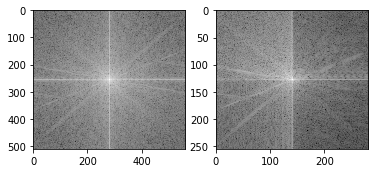

89.32904648780823


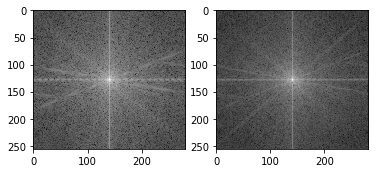

0.026479721069335938


In [126]:
im1 = plt.imread('../input_data/cameraman.png',0)
im2 = rgb2gray(plt.imread('../input_data/gray.jpeg',0))

im1,im2 = sizez(im1,im2)

time_conv = checkConv(im1,im2)
time_mult = checkMult(im1,im2)

(512, 512)
(512, 413)


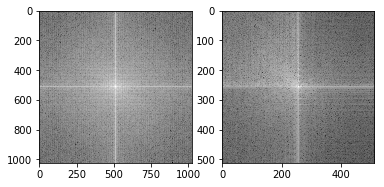

1707.3770027160645


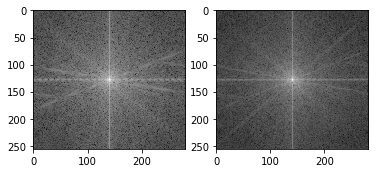

0.04308748245239258


In [129]:
im3 = cv2.imread("../input_data/lena.jpg",0)
im4 = cv2.imread("../input_data/bricks.jpg",0)

im3,im4 = sizez(im3,im4)

time_conv = checkConv(im3,im4)
time_mult = checkMult(im3,im4)

### For smaller sizes of f, convolution works better. For larger sizes, FFT works better.